# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Faza Syaquille Suny
- **Email:** sunyfaza@gmail.com
- **ID Dicoding:** fazasuny

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda?
- Pertanyaan 2 : Bagaimana Tren Musim Mempengaruhi Jumlah Penyewaan Sepeda?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

memproses data data yang didapat

### Gathering Data

memasukan day.csv yg brisi data penyewaan sepeda per hari

In [18]:
day_df = pd.read_csv("main-data.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

memeriksa apakah data lengkap atau tidak

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


mengecek apakah ada data yang terduplikasi atau tidak

In [20]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

membereskan data data yg hilang atau terduplikasi

In [21]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

melihat parameter data

In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


membuat seperti pivot table kepada cuaca

In [23]:
day_df.groupby(by="weathersit").agg({
    "cnt": "nunique",
    "windspeed": ["max", "min", "mean", "std"]
})

cnt windspeed                              
           nunique       max       min      mean       std
weathersit                                                
1              451  0.507463  0.022392  0.190253  0.077530
2              243  0.414800  0.047275  0.186431  0.075331
3               21  0.358200  0.097021  0.243336  0.086185

mengelompokan berdasarkan season dan melihat parameter nya

In [24]:
day_df.groupby(by="season").agg({
    "cnt": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

cnt mnth                         
       nunique  max min       mean       std
season                                      
1          179   12   1   3.093923  3.403759
2          182    6   3   4.652174  0.951671
3          188    9   6   7.691489  0.948137
4          176   12   9  10.696629  0.919402

In [25]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,weathersit,cnt
0,1,451
1,2,243
2,3,21


In [26]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,3,188
1,2,182
2,1,179
3,4,176


In [27]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda?

Menghitung persentase penyewaan untuk setiap cuaca dengan membagi total penyewaan pada cuaca tersebut dengan total penyewaan keseluruhan

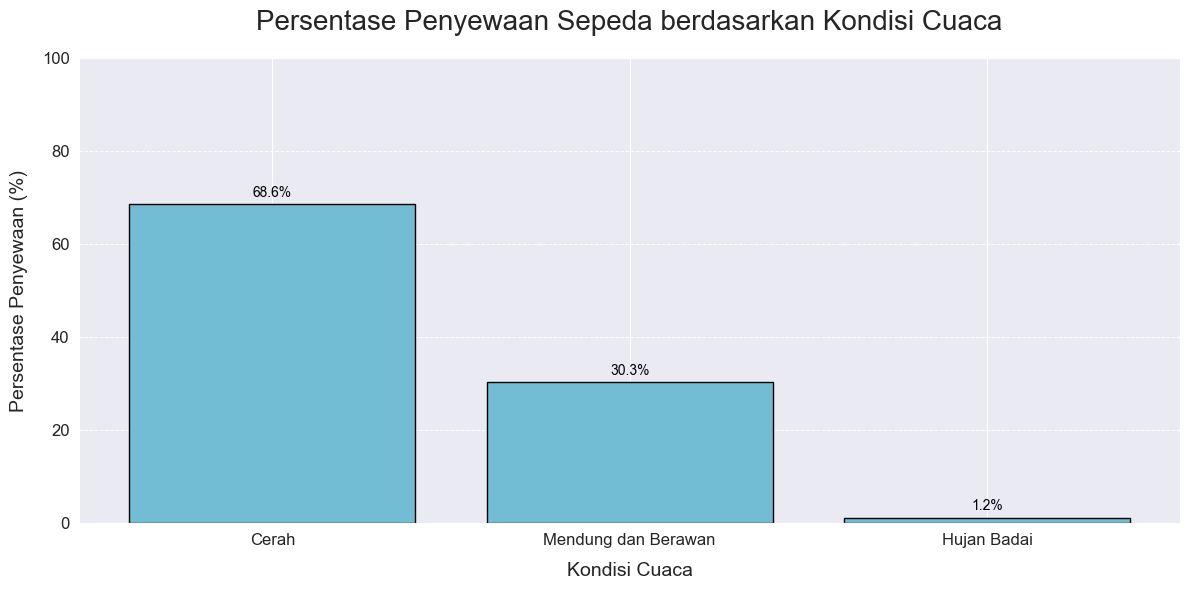

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menghitung total penyewaan berdasarkan kondisi cuaca
total_orders_df = day_df.groupby('weathersit').agg({"cnt": "sum"}).reset_index()

total_rentals = total_orders_df["cnt"].sum()
total_orders_df["percentage"] = (total_orders_df["cnt"] / total_rentals) * 100

# Mapping kondisi cuaca
weather_conditions = {
    1: "Cerah",
    2: "Mendung dan Berawan",
    3: "Hujan Badai",
    4: "Badai Salju"
}

total_orders_df['weathersit'] = total_orders_df['weathersit'].map(weather_conditions)

# Rename kolom
total_orders_df.rename(columns={
    "weathersit": "Kondisi Cuaca",
    "percentage": "Persentase Penyewaan"
}, inplace=True)

# Mengatur gaya seaborn
sns.set_style("darkgrid")

# Membuat plot
plt.figure(figsize=(12, 6))
bars = plt.bar(total_orders_df["Kondisi Cuaca"], total_orders_df["Persentase Penyewaan"], color="#72BCD4", edgecolor='black')

# Menambahkan label pada bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title("Persentase Penyewaan Sepeda berdasarkan Kondisi Cuaca", loc="center", fontsize=20, pad=20)
plt.xlabel("Kondisi Cuaca", fontsize=14, labelpad=10)
plt.ylabel("Persentase Penyewaan (%)", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)

# Menambahkan grid
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana Tren Musim Mempengaruhi Jumlah Penyewaan Sepeda?

Mengelompokkan data berdasarkan season (musim) dan menjumlahkan total penyewaan sepeda untuk setiap musim.

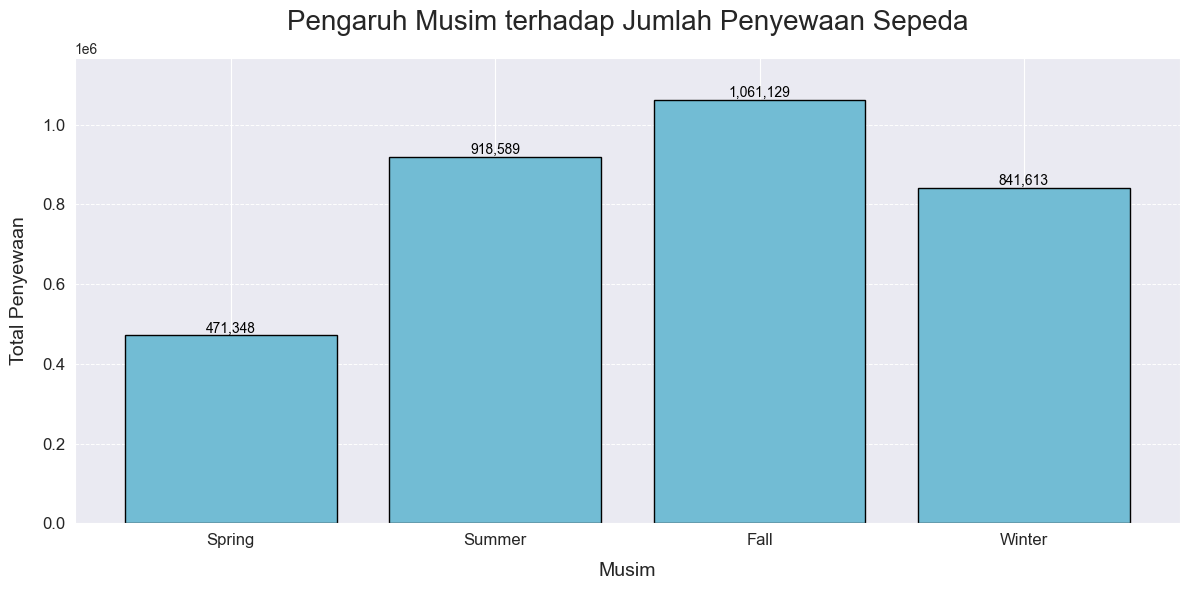

In [37]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

seasonal_orders_df = day_df.groupby('season').agg({
    "cnt": "sum"
}).reset_index()

season_labels = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

seasonal_orders_df['season'] = seasonal_orders_df['season'].map(season_labels)

seasonal_orders_df.rename(columns={
    "season": "Musim",
    "cnt": "Total Penyewaan"
}, inplace=True)

total_rentals = seasonal_orders_df["Total Penyewaan"].sum()
seasonal_orders_df["Persentase Penyewaan"] = (seasonal_orders_df["Total Penyewaan"] / total_rentals) * 100

sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
bars = plt.bar(seasonal_orders_df["Musim"], seasonal_orders_df["Total Penyewaan"], color="#72BCD4", edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(yval):,}', ha='center', va='bottom', fontsize=10, color='black')

plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda", loc="center", fontsize=20, pad=20)
plt.xlabel("Musim", fontsize=14, labelpad=10)
plt.ylabel("Total Penyewaan", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, seasonal_orders_df["Total Penyewaan"].max() * 1.1) 

plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()

plt.show()

## Conclusion 

- Conclution pertanyaan 1 : Persentase penyewaan sepeda dapat dipengaruhi secara signifikan oleh kondisi cuaca. Kondisi cerah mungkin menyebabkan peningkatan penyewaan, sedangkan kondisi buruk seperti hujan atau salju dapat menurunkan jumlah penyewaan.

- Conclution pertanyaan 2 : berdasarkan grafik diatas dapat dilihat bahwa ketika musim gugur pengguna sepeda paling banyak saat itu, dan ketika musim panas paling sedikit. hal ini bisa dipengaruhi akibat para pengguna sepeda menyukai kondisi dimana suhu itu tidak terlalu dingin dan tidak terlalu panas

In [39]:
# Konversi 'dteday' ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Hitung total penyewaan per hari
rfm_df = day_df.groupby("dteday").agg({"cnt": "sum"}).reset_index()

# Hitung recency
recent_date = day_df["dteday"].max()
rfm_df["recency"] = (recent_date - rfm_df["dteday"]).dt.days

# Setiap hari dihitung sebagai satu transaksi karena df ini tidak memiliki customers_id, jadi aku asumsikan 1 hari 1 transaksi
rfm_df["frequency"] = 1

# Ubah nama kolom
rfm_df.rename(columns={"cnt": "monetary"}, inplace=True)

rfm_df.head()


,dteday,monetary,recency,frequency
0,2011-01-01,985,730,1
1,2011-01-02,801,729,1
2,2011-01-03,1349,728,1
3,2011-01-04,1562,727,1
4,2011-01-05,1600,726,1


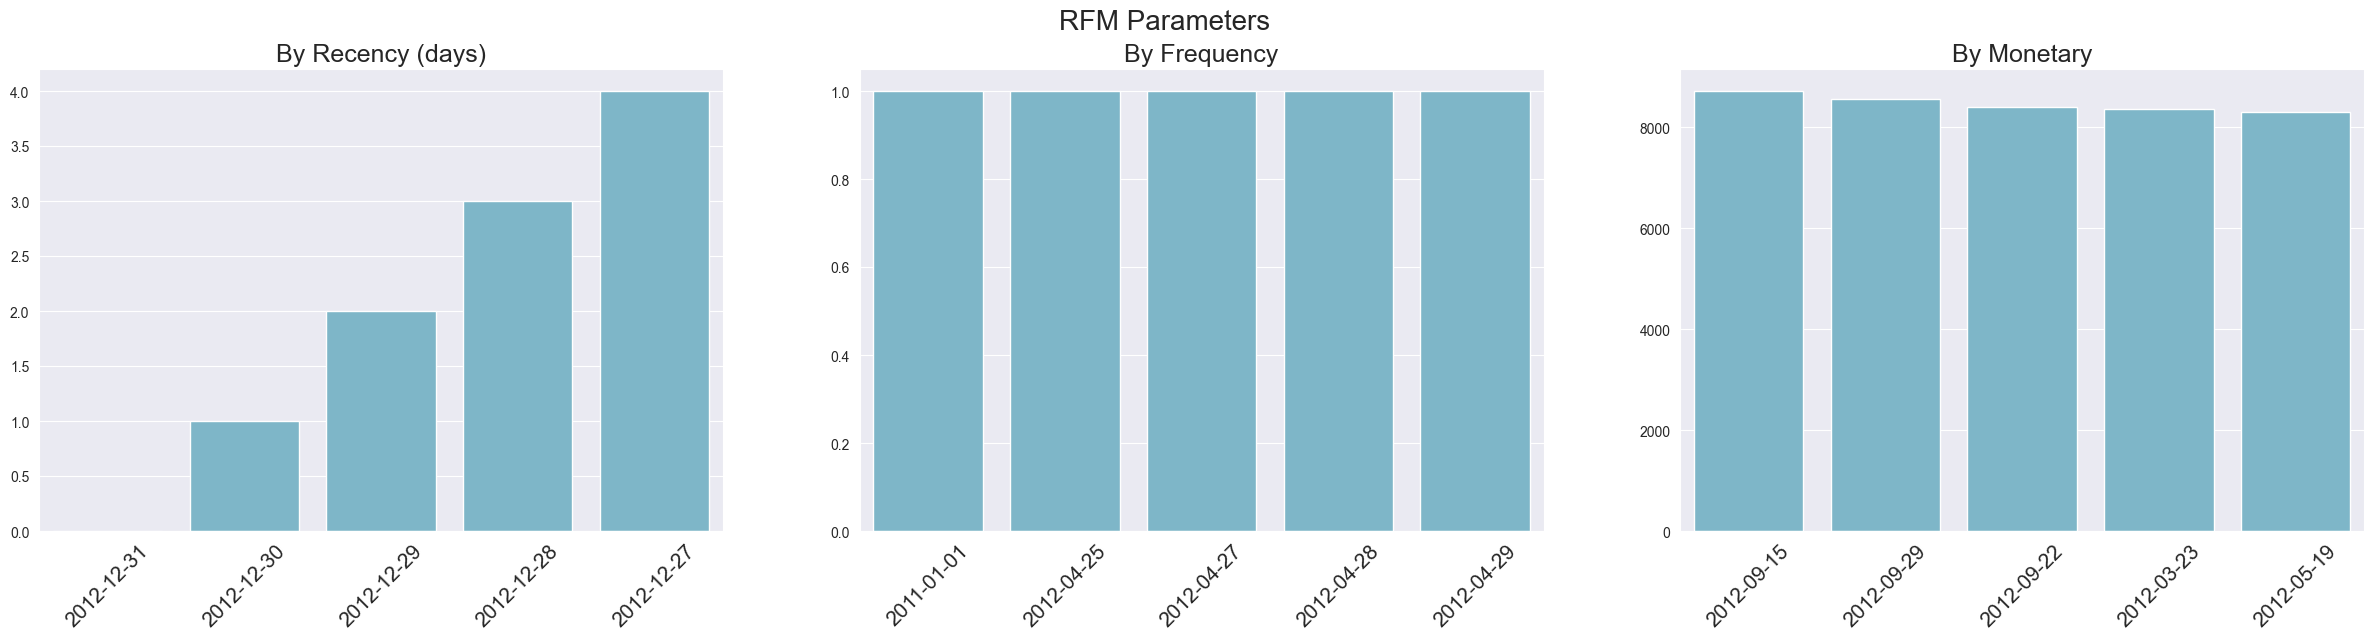

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan 3 subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Visualisasi Recency
sns.barplot(y="recency", x="dteday", hue="dteday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0], legend=False, palette=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

# Visualisasi Frequency
sns.barplot(y="frequency", x="dteday", hue="dteday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1], legend=False, palette=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# Visualisasi Monetary
sns.barplot(y="monetary", x="dteday", hue="dteday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2], legend=False, palette=colors)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

# Menambahkan judul utama
plt.suptitle("RFM Parameters", fontsize=20)

plt.show()
